# **Importing required Libraries**

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# **Data Extraction**

In [19]:
df=pd.read_csv('/content/credit_customers.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [20]:
df.isna().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


In [21]:
df.dtypes

,0
checking_status,object
duration,float64
credit_history,object
purpose,object
credit_amount,float64
savings_status,object
employment,object
installment_commitment,float64
personal_status,object
other_parties,object


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [23]:
lst=['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker','class']
for i in lst:
  v=df[i].value_counts()
  print(i)
  print(v)
  print('--------------------------------------------------')

checking_status
checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: count, dtype: int64
--------------------------------------------------
credit_history
credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: count, dtype: int64
--------------------------------------------------
purpose
purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: count, dtype: int64
--------------------------------------------------
savings_status
savings_status
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name:

In [24]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

# **Data Visualization**

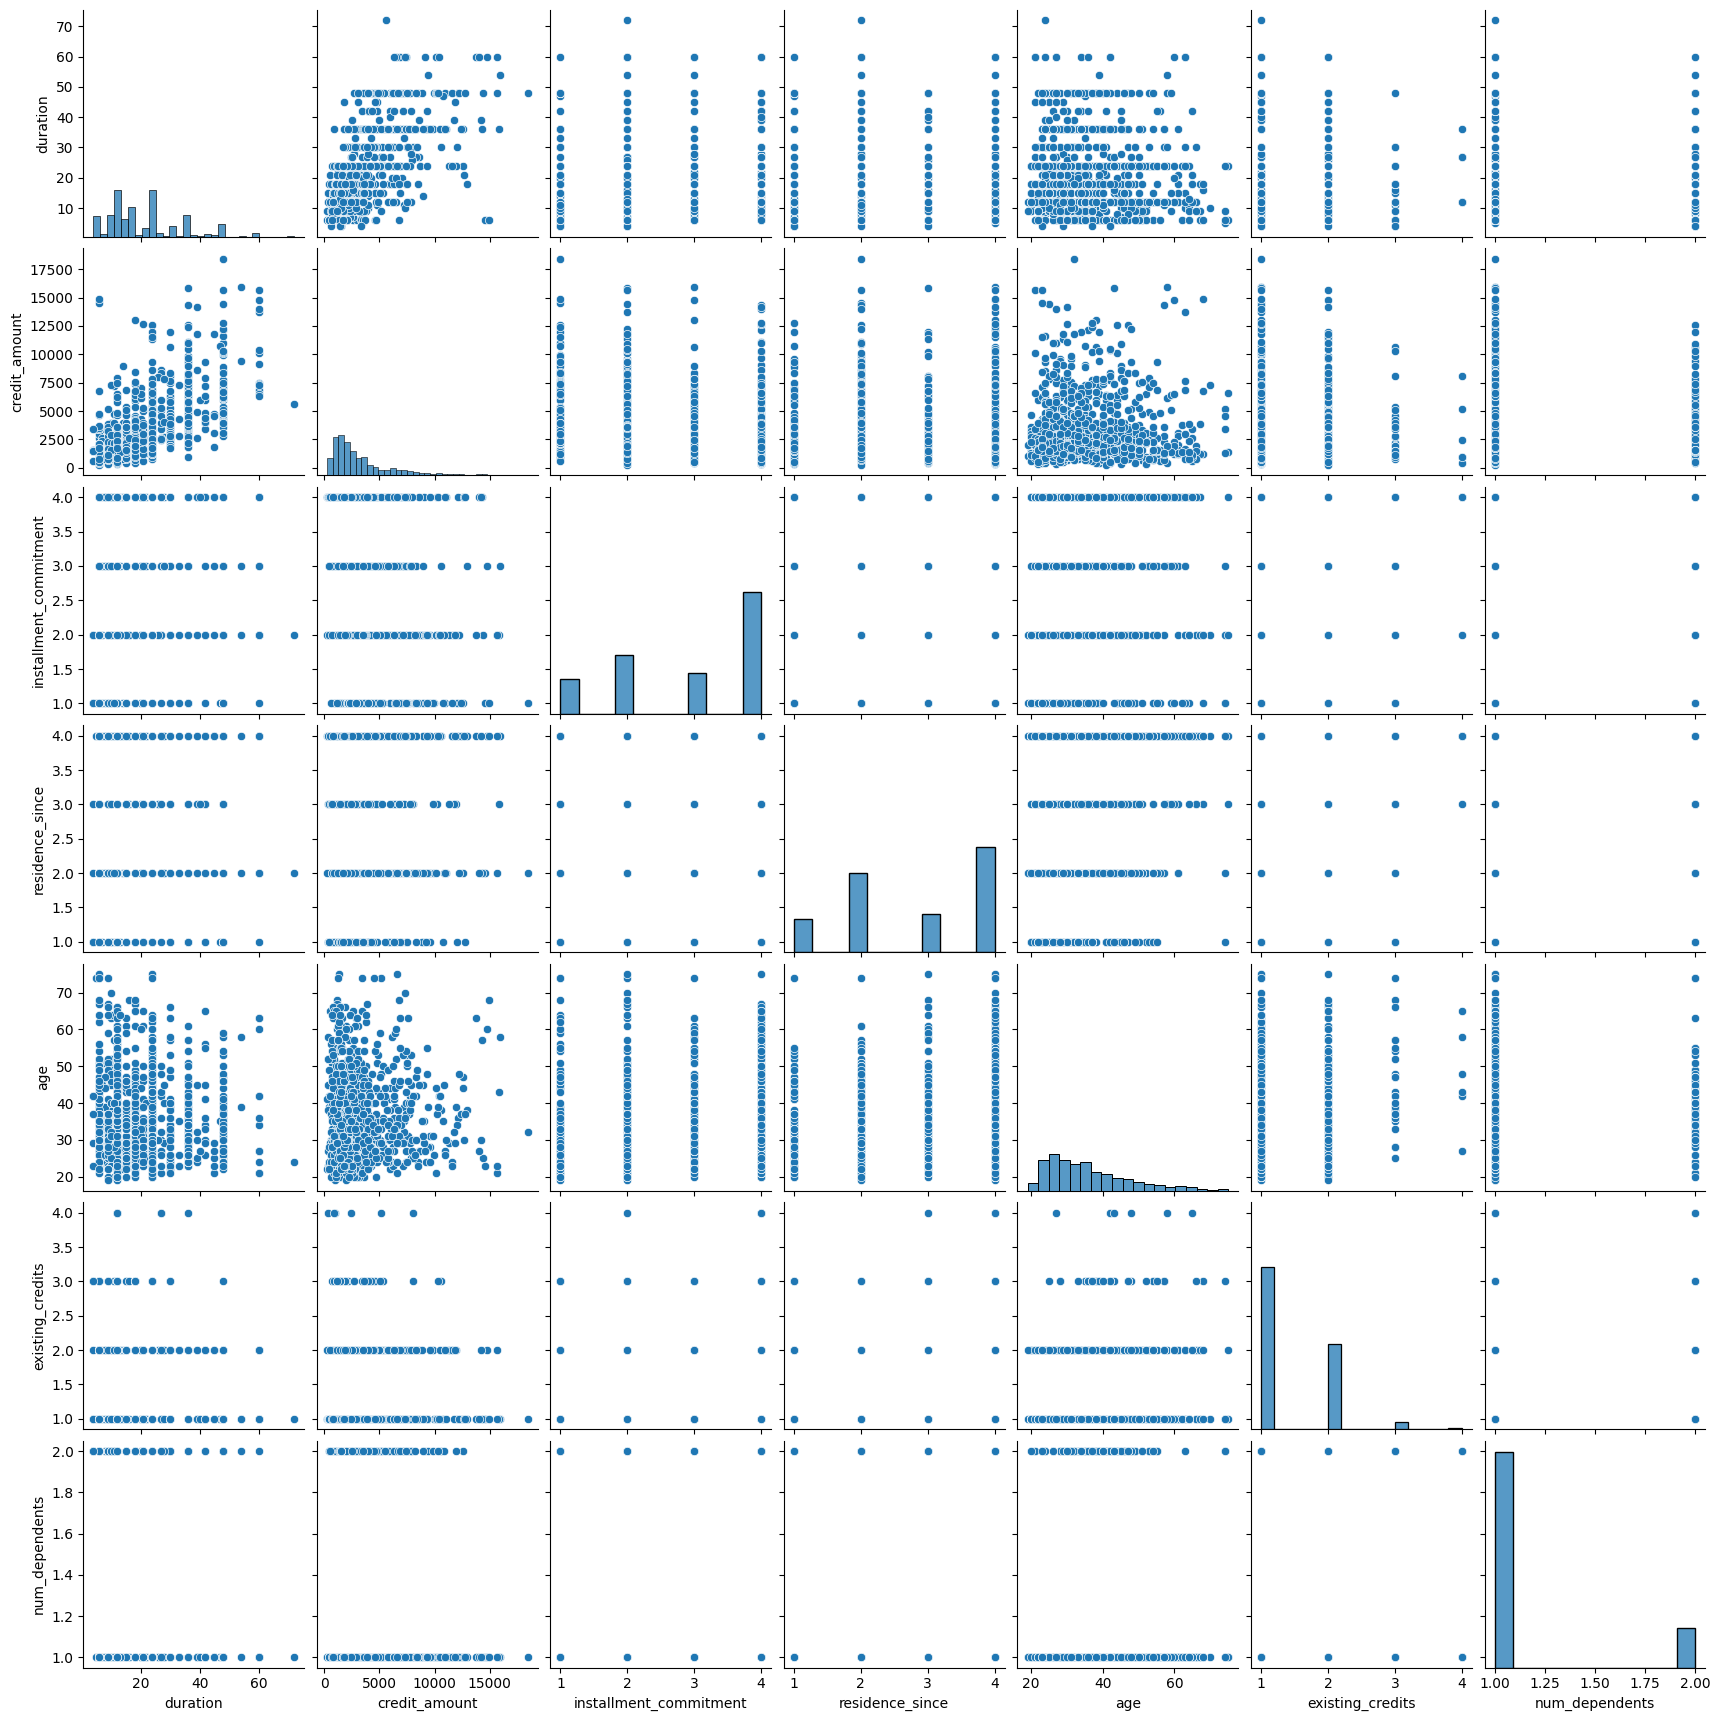

In [25]:
sns.pairplot(df)

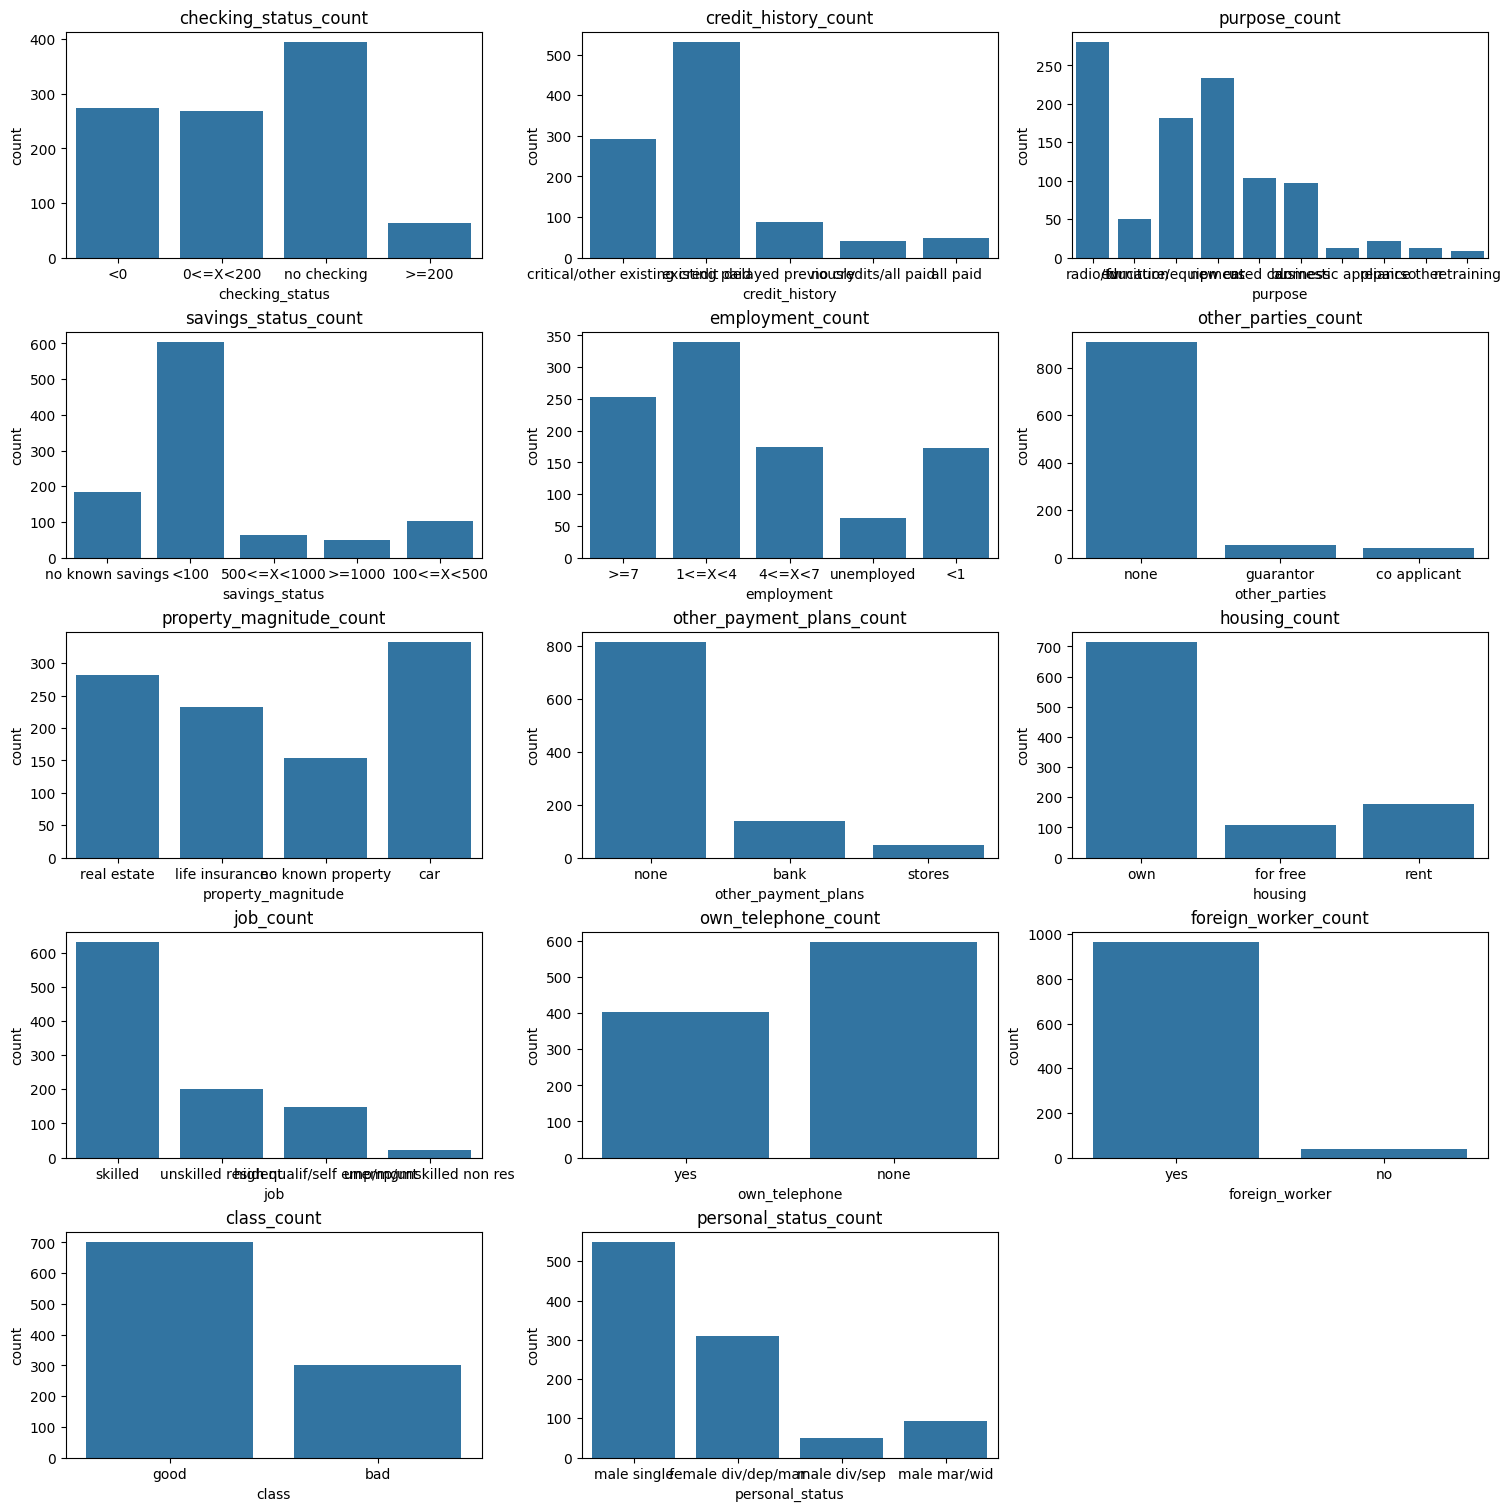

In [26]:
col_count=['checking_status', 'credit_history', 'purpose', 'savings_status','employment', 'other_parties', 'property_magnitude','other_payment_plans', 'housing', 'job', 'own_telephone','foreign_worker', 'class', 'personal_status']
plt.figure(figsize=(15,15),layout='constrained')
for i in range(len(col_count)):
    plt.subplot(5,3,i+1)
    sns.countplot(data=df,x=col_count[i])
    plt.title(col_count[i]+'_count',)
plt.show()

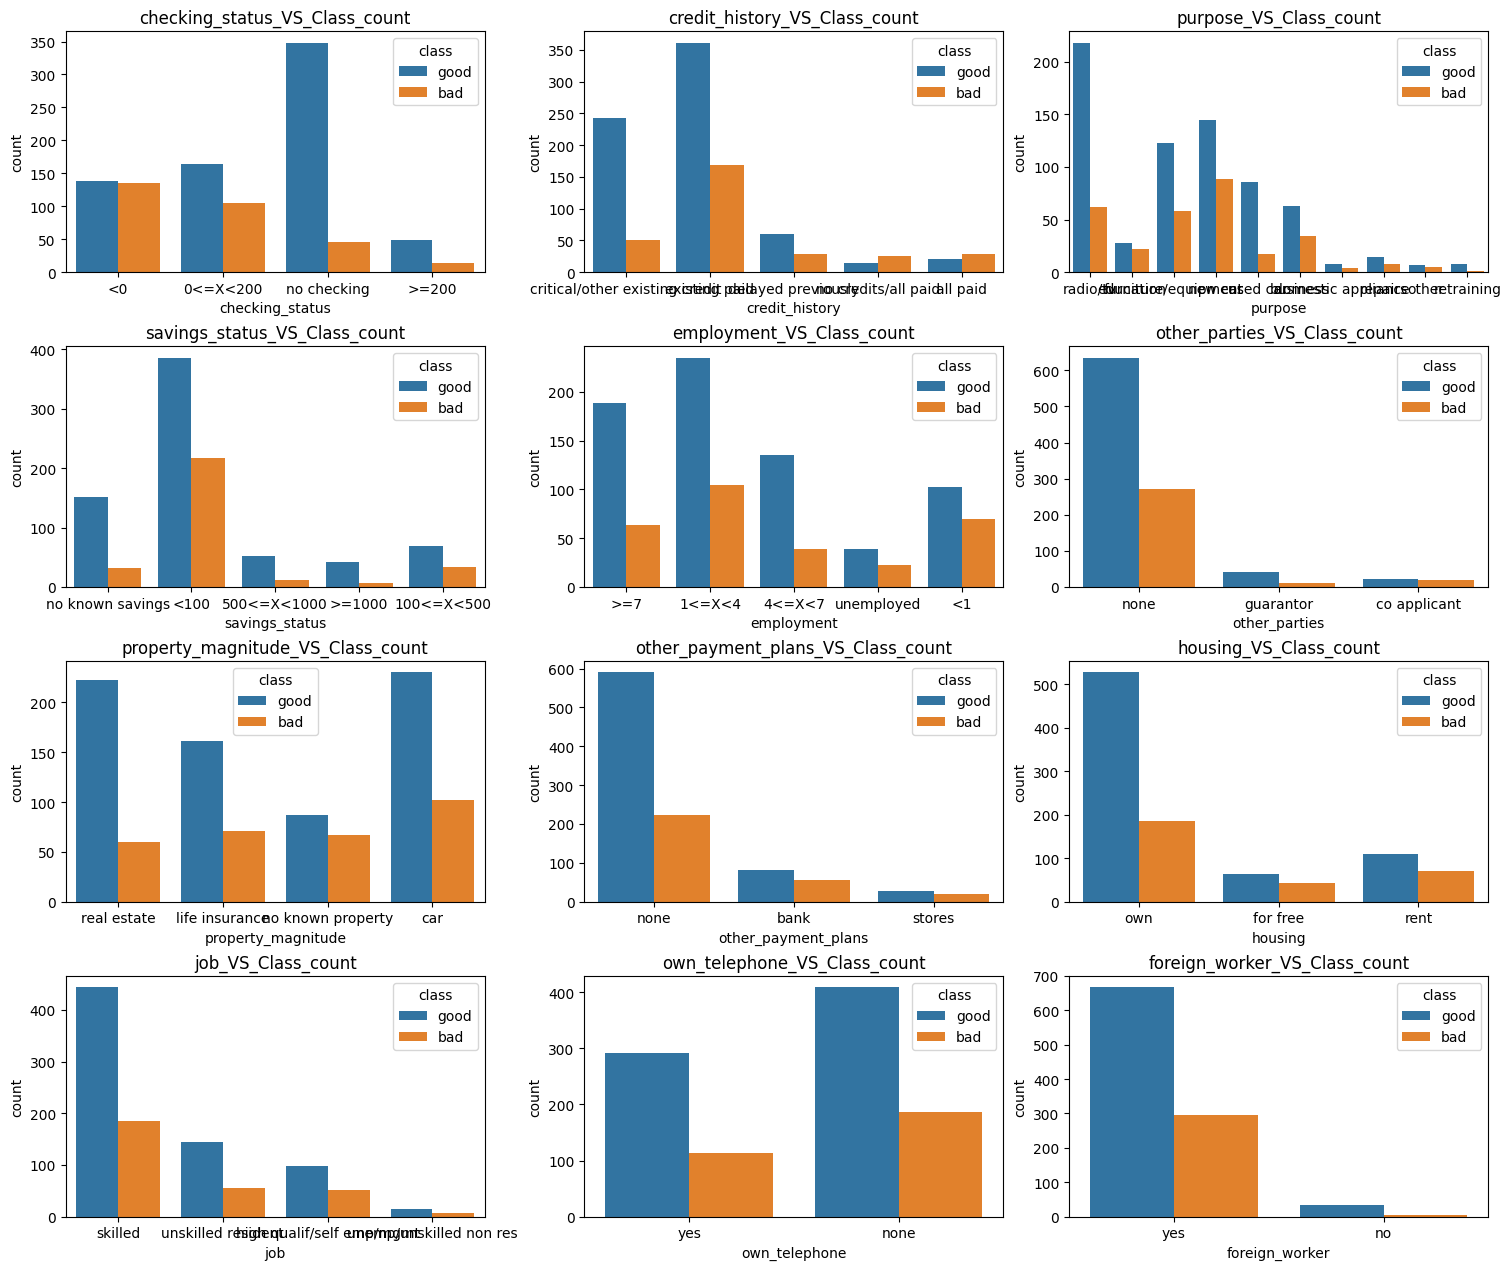

In [27]:
col_cls=['checking_status', 'credit_history', 'purpose', 'savings_status','employment', 'other_parties', 'property_magnitude','other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']
plt.figure(figsize=(15,15),layout='constrained')
for i in range(len(col_cls)):
    plt.subplot(5,3,i+1)
    sns.countplot(data=df,x=col_cls[i],hue='class')
    plt.title(col_cls[i]+'_VS_Class_count')
plt.show()

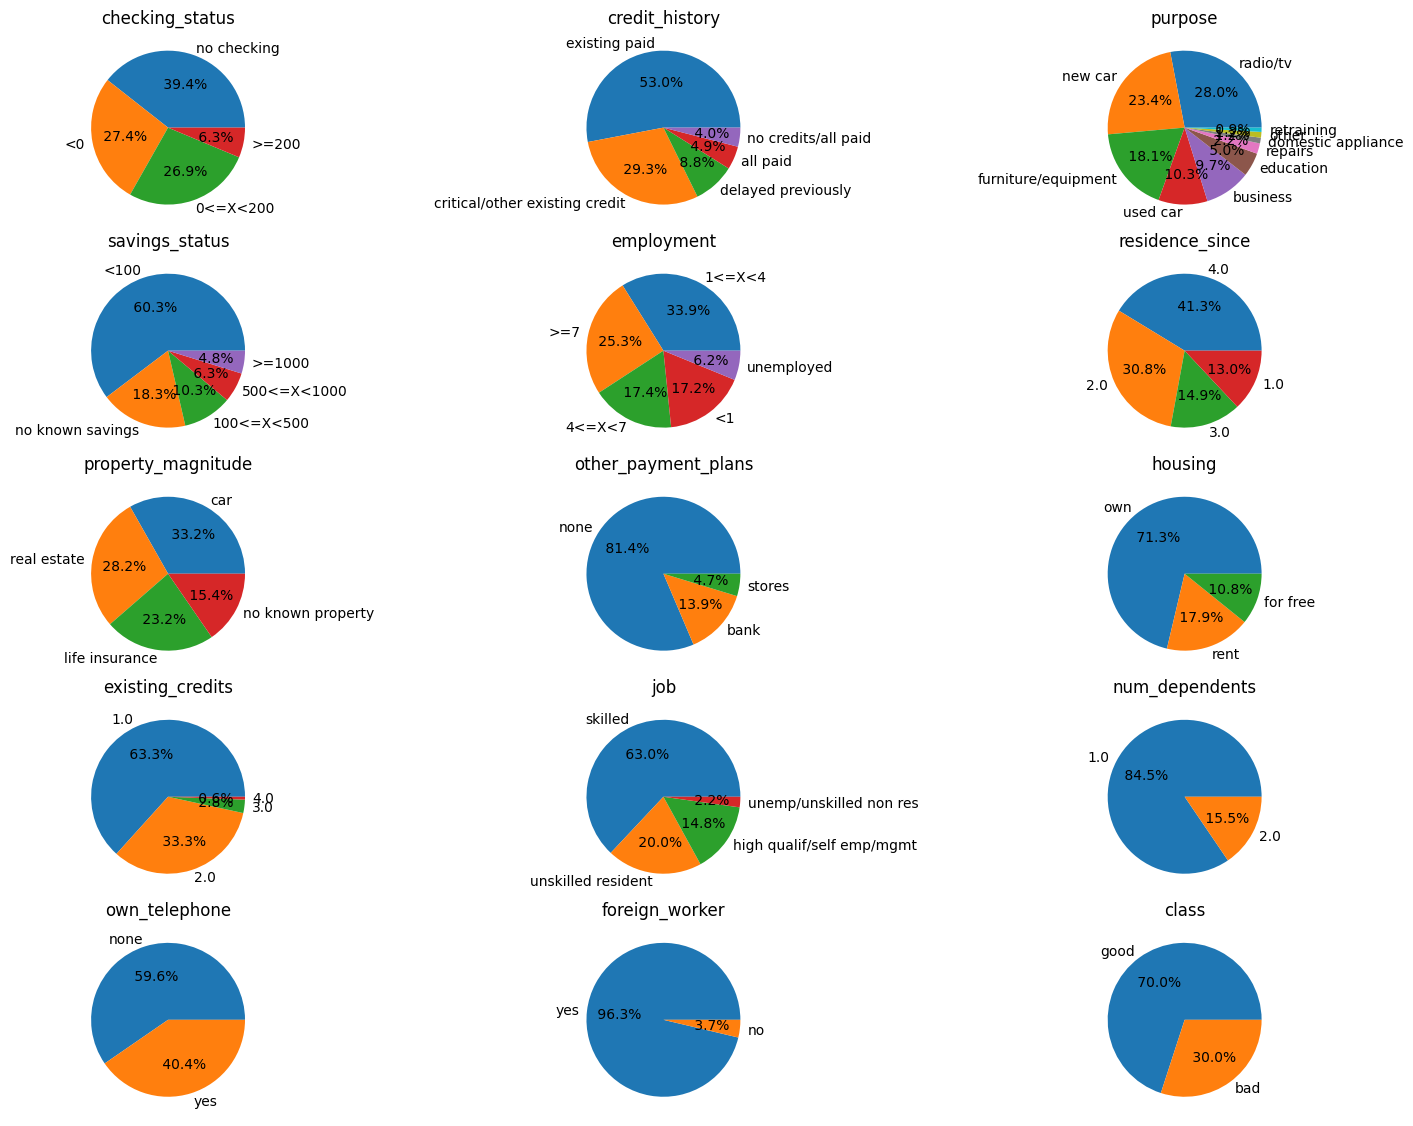

In [28]:
col=['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment','residence_since', 'property_magnitude', 'other_payment_plans','housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone','foreign_worker', 'class']
plt.figure(figsize=(15,15),layout='constrained')
for i in range(len(col)):
    plt.subplot(7,3,i+1)
    a=df[col[i]].value_counts()
    lbl=a.index
    plt.pie(x=a,labels=lbl,autopct="% .1f%%")
    plt.title(col[i])
plt.show()

# **Data Preprocessing**

In [29]:
lst1=['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker','class']
le=LabelEncoder()
for i in lst1:
  df[i]=le.fit_transform(df[i])

In [30]:
df.dtypes

,0
checking_status,int64
duration,float64
credit_history,int64
purpose,int64
credit_amount,float64
savings_status,int64
employment,int64
installment_commitment,float64
personal_status,int64
other_parties,int64


In [31]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0


In [32]:
X=df.iloc[:,:-1]
y=df['class']

In [33]:
sd=StandardScaler()
X_new=sd.fit_transform(X)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=24)


# **Classification Model**

1.KNN

2.SVC

3.Naive bayes

4.Decision Tree

5.Adaboost Classifier

6.RandomForest Classifier

              precision    recall  f1-score   support

           0       0.48      0.26      0.34        92
           1       0.73      0.88      0.79       208

    accuracy                           0.69       300
   macro avg       0.60      0.57      0.57       300
weighted avg       0.65      0.69      0.65       300



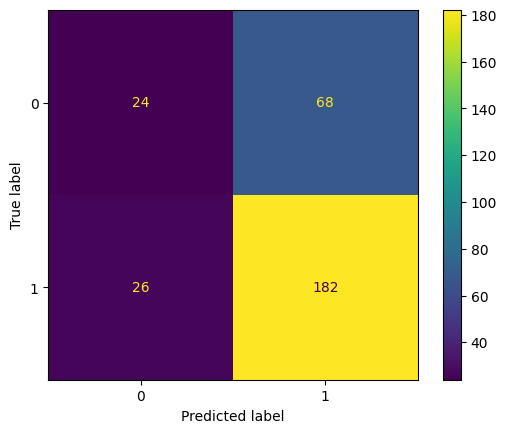

In [35]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
Ack=accuracy_score(y_test,y_pred)*100

              precision    recall  f1-score   support

           0       0.53      0.21      0.30        92
           1       0.72      0.92      0.81       208

    accuracy                           0.70       300
   macro avg       0.63      0.56      0.55       300
weighted avg       0.66      0.70      0.65       300



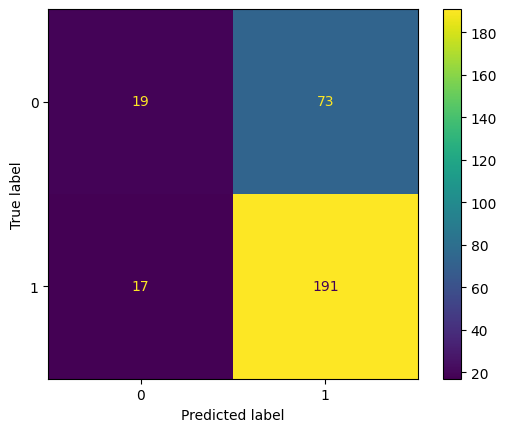

In [36]:
svc=SVC()
svc.fit(X_train,y_train)
y_preds=svc.predict(X_test)
print(classification_report(y_test,y_preds))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
Acs=accuracy_score(y_test,y_preds)*100

              precision    recall  f1-score   support

           0       0.49      0.59      0.53        92
           1       0.80      0.73      0.76       208

    accuracy                           0.69       300
   macro avg       0.65      0.66      0.65       300
weighted avg       0.71      0.69      0.69       300



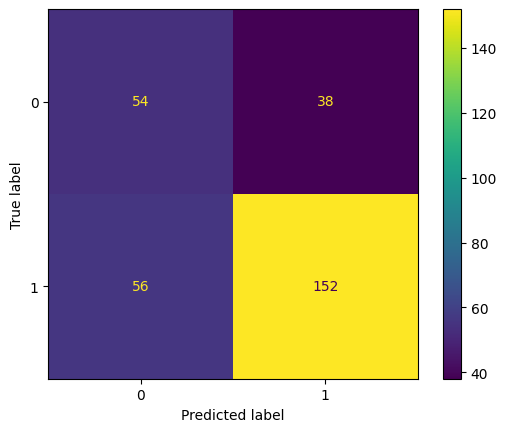

In [37]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_predn=nb.predict(X_test)
print(classification_report(y_test,y_predn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_predn))
Acn=accuracy_score(y_test,y_predn)*100

              precision    recall  f1-score   support

           0       0.46      0.45      0.45        92
           1       0.76      0.76      0.76       208

    accuracy                           0.67       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.66      0.67      0.67       300



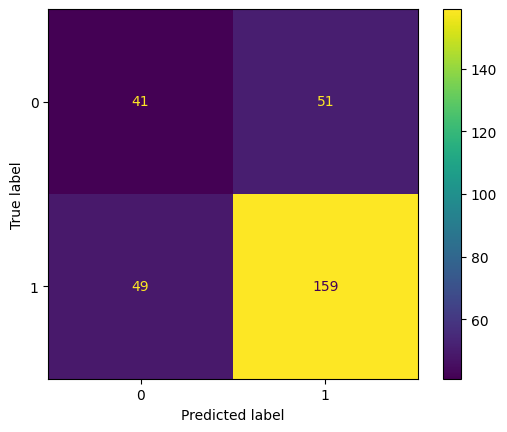

In [38]:
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
y_predt=tree.predict(X_test)
print(classification_report(y_test,y_predt))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_predt))
Act=accuracy_score(y_test,y_predt)*100

              precision    recall  f1-score   support

           0       0.63      0.34      0.44        92
           1       0.76      0.91      0.83       208

    accuracy                           0.74       300
   macro avg       0.69      0.63      0.63       300
weighted avg       0.72      0.74      0.71       300



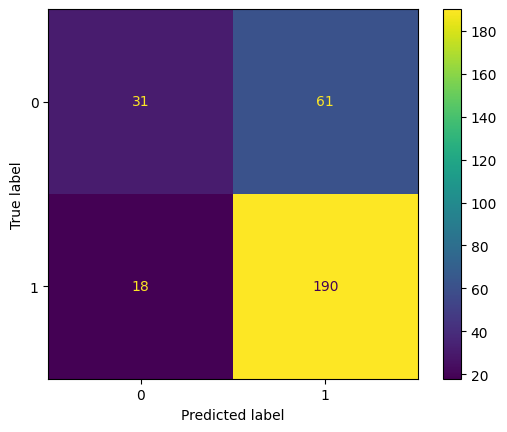

In [39]:
ab=AdaBoostClassifier(n_estimators=10,random_state=0)
ab.fit(X_train,y_train)
y_preda=ab.predict(X_test)
print(classification_report(y_test,y_preda))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preda))
Aca=accuracy_score(y_test,y_preda)*100

              precision    recall  f1-score   support

           0       0.57      0.30      0.40        92
           1       0.75      0.90      0.81       208

    accuracy                           0.72       300
   macro avg       0.66      0.60      0.61       300
weighted avg       0.69      0.72      0.69       300



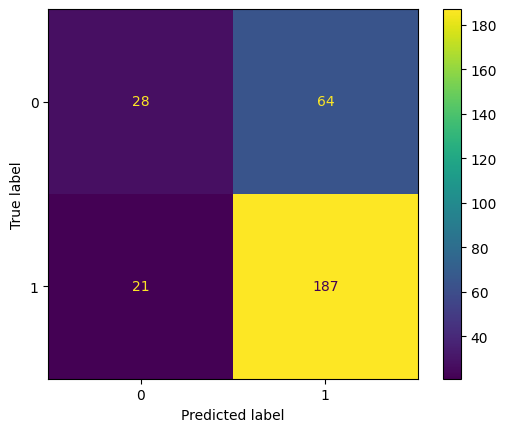

In [40]:
rf= RandomForestClassifier(n_estimators=15, random_state=3)
rf.fit(X_train,y_train)
y_predst=rf.predict(X_test)
print(classification_report(y_test,y_predst))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_predst))
Acr=accuracy_score(y_test,y_predst)*100

In [41]:
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['KNN','SVM','Gaussian NB','Decision Tree','AdaBoostClassifier','Random Forest'])
tbl['Accuracy']=pd.Series([Ack,Acs,Acn,Act,Aca,Acr])
tbl

,Model,Accuracy
0,KNN,68.666667
1,SVM,70.000000
2,Gaussian NB,68.666667
3,Decision Tree,66.666667
4,AdaBoostClassifier,73.666667
5,Random Forest,71.666667


# **Oversampling**


1.KNN

2.SVC

3.Naive bayes

4.Decision Tree

5.AdaBoostClassifier

6.RandomForest classifier

In [42]:
over=SMOTE(random_state=45)
X_os,y_os=over.fit_resample(X,y)

In [43]:
y_os.value_counts()

,count
class,
1,700
0,700


In [44]:
X_traino,X_testo,y_traino,y_testo=train_test_split(X_os,y_os,test_size=0.3,random_state=45)

              precision    recall  f1-score   support

           0       0.62      0.77      0.69       207
           1       0.71      0.54      0.61       213

    accuracy                           0.65       420
   macro avg       0.66      0.65      0.65       420
weighted avg       0.66      0.65      0.65       420



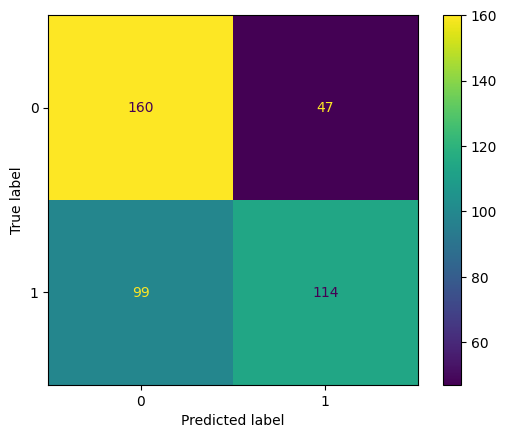

In [45]:
knn0=KNeighborsClassifier(n_neighbors=5)
knn0.fit(X_traino,y_traino)
y_predok=knn0.predict(X_testo)
print(classification_report(y_testo,y_predok))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predok))
Acok=accuracy_score(y_testo,y_predok)*100

              precision    recall  f1-score   support

           0       0.58      0.30      0.40       207
           1       0.54      0.79      0.64       213

    accuracy                           0.55       420
   macro avg       0.56      0.55      0.52       420
weighted avg       0.56      0.55      0.52       420



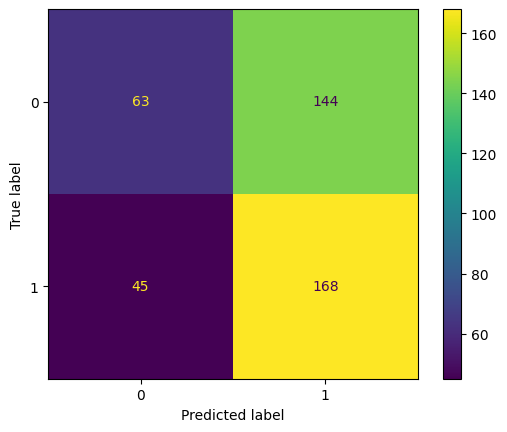

In [46]:
svc0=SVC()
svc0.fit(X_traino,y_traino)
y_predos=svc0.predict(X_testo)
print(classification_report(y_testo,y_predos))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predos))
Acos=accuracy_score(y_testo,y_predos)*100

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       207
           1       0.82      0.70      0.75       213

    accuracy                           0.77       420
   macro avg       0.77      0.77      0.77       420
weighted avg       0.78      0.77      0.77       420



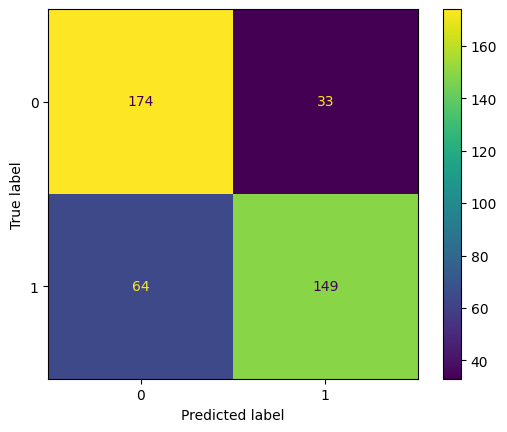

In [47]:
nb0=GaussianNB()
nb0.fit(X_traino,y_traino)
y_predon=nb0.predict(X_testo)
print(classification_report(y_testo,y_predon))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predon))
Acon=accuracy_score(y_testo,y_predon)*100

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       207
           1       0.74      0.75      0.74       213

    accuracy                           0.74       420
   macro avg       0.74      0.74      0.74       420
weighted avg       0.74      0.74      0.74       420



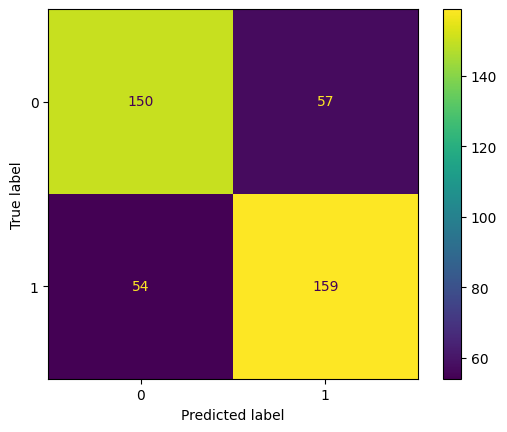

In [48]:
tree0=DecisionTreeClassifier(criterion='entropy')
tree0.fit(X_traino,y_traino)
y_predot=tree0.predict(X_testo)
print(classification_report(y_testo,y_predot))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predot))
Acot=accuracy_score(y_testo,y_predot)*100

              precision    recall  f1-score   support

           0       0.76      0.87      0.82       207
           1       0.86      0.74      0.79       213

    accuracy                           0.80       420
   macro avg       0.81      0.81      0.80       420
weighted avg       0.81      0.80      0.80       420



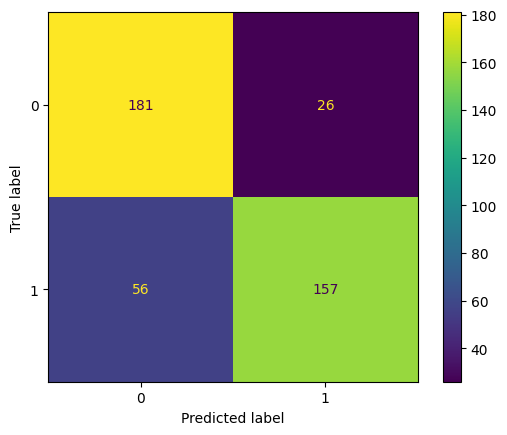

In [49]:
ab0=AdaBoostClassifier(n_estimators=10,random_state=0)
ab0.fit(X_traino,y_traino)
y_predoa=ab0.predict(X_testo)
print(classification_report(y_testo,y_predoa))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predoa))
Acoa=accuracy_score(y_testo,y_predoa)*100

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       207
           1       0.81      0.81      0.81       213

    accuracy                           0.80       420
   macro avg       0.80      0.80      0.80       420
weighted avg       0.80      0.80      0.80       420



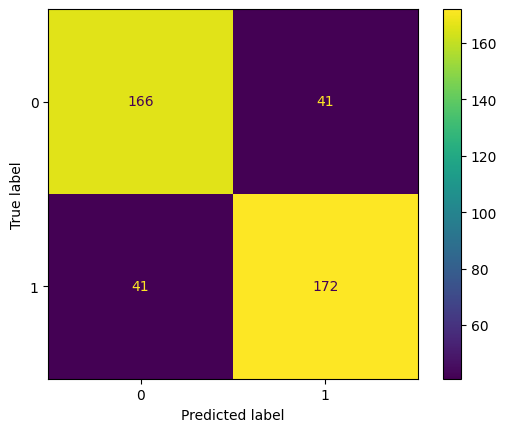

In [50]:
rf0= RandomForestClassifier(n_estimators=15, random_state=3)
rf0.fit(X_traino,y_traino)
y_predor=rf0.predict(X_testo)
print(classification_report(y_testo,y_predor))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predor))
Acor=accuracy_score(y_testo,y_predor)*100

In [51]:
tbl['Accuracy_oversampling']=pd.Series([Acok,Acos,Acon,Acot,Acoa,Acor])
tbl

,Model,Accuracy,Accuracy_oversampling
0,KNN,68.666667,65.238095
1,SVM,70.000000,55.000000
2,Gaussian NB,68.666667,76.904762
3,Decision Tree,66.666667,73.571429
4,AdaBoostClassifier,73.666667,80.476190
5,Random Forest,71.666667,80.476190


# **Hyper parameter Tuning**

1.KNN

2.Naive bayes

3.Decision Tree

4.AdaBoostClassifier

5.RandomForest Classifier




In [52]:
Knnh={'n_neighbors':[3,5,7,9],'weights':['uniform','distance']}
cls=GridSearchCV(knn,Knnh,cv=10,scoring='accuracy')
cls.fit(X_traino,y_traino)
print(cls.best_params_)

{'n_neighbors': 5, 'weights': 'distance'}


In [53]:
nbh={'var_smoothing':[0.6,1.2,2.4,0.9]}
cls=GridSearchCV(nb,nbh,cv=10,scoring='accuracy')
cls.fit(X_traino,y_traino)
print(cls.best_params_)

{'var_smoothing': 2.4}


In [54]:
treeh={'criterion':['gini','entropy'],'splitter':['best','random']}
cls=GridSearchCV(tree,treeh,cv=10,scoring='accuracy')
cls.fit(X_traino,y_traino)
print(cls.best_params_)

{'criterion': 'entropy', 'splitter': 'best'}


In [55]:
abh={'n_estimators':[10,50,100,200,250],'learning_rate':[0.0001,0.001,0.1,0.2,1]}
cls=GridSearchCV(ab,abh,cv=10,scoring='accuracy')
cls.fit(X_traino,y_traino)
print(cls.best_params_)

{'learning_rate': 1, 'n_estimators': 100}


In [56]:
rfh={'n_estimators':[10,15,20,25,30,35]}
cls=GridSearchCV(rf,rfh,cv=10,scoring='accuracy')
cls.fit(X_traino,y_traino)
print(cls.best_params_)

{'n_estimators': 30}


**Classification Model**

1.KNN

2.Naive Bayes

3.Decision Tree

4.Adabooster Classifier

5.RandomForest Classifier

              precision    recall  f1-score   support

           0       0.62      0.79      0.69       207
           1       0.72      0.52      0.60       213

    accuracy                           0.65       420
   macro avg       0.67      0.66      0.65       420
weighted avg       0.67      0.65      0.65       420



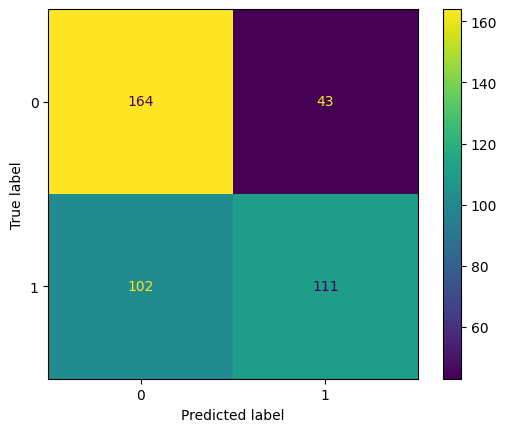

In [57]:
knn2=KNeighborsClassifier(n_neighbors=5 ,weights='distance')
knn2.fit(X_traino,y_traino)
y_predhk=knn2.predict(X_testo)
print(classification_report(y_testo,y_predhk))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predhk))
Achk=accuracy_score(y_testo,y_predhk)*100

              precision    recall  f1-score   support

           0       0.64      0.23      0.33       207
           1       0.54      0.87      0.67       213

    accuracy                           0.55       420
   macro avg       0.59      0.55      0.50       420
weighted avg       0.59      0.55      0.50       420



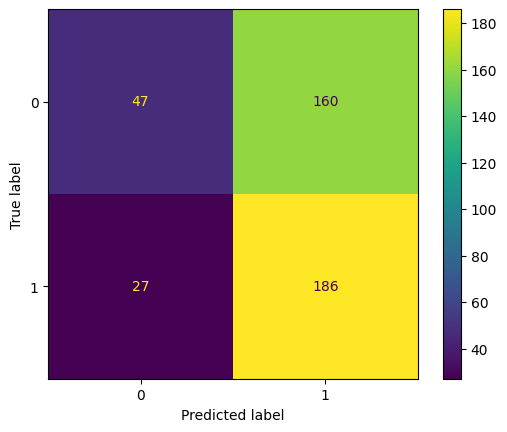

In [58]:
nb2=GaussianNB(var_smoothing= 2.4)
nb2.fit(X_traino,y_traino)
y_predhn=nb2.predict(X_testo)
print(classification_report(y_testo,y_predhn))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predhn))
Achn=accuracy_score(y_testo,y_predhn)*100

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       207
           1       0.76      0.76      0.76       213

    accuracy                           0.75       420
   macro avg       0.75      0.75      0.75       420
weighted avg       0.75      0.75      0.75       420



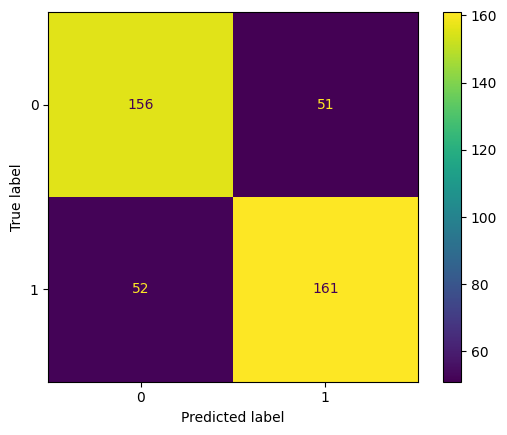

In [59]:
tree2=DecisionTreeClassifier(criterion = 'entropy', splitter= 'best')
tree2.fit(X_traino,y_traino)
y_predht=tree2.predict(X_testo)
print(classification_report(y_testo,y_predht))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predht))
Acht=accuracy_score(y_testo,y_predht)*100

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       207
           1       0.88      0.75      0.81       213

    accuracy                           0.82       420
   macro avg       0.83      0.82      0.82       420
weighted avg       0.83      0.82      0.82       420



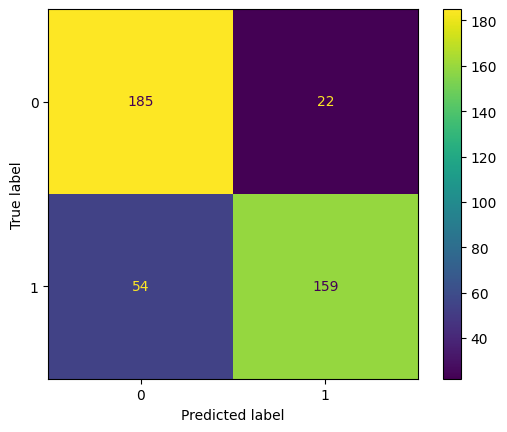

In [60]:
ab2=AdaBoostClassifier(n_estimators=250,random_state=1,learning_rate=0.2)
ab2.fit(X_traino,y_traino)
y_predha=ab2.predict(X_testo)
print(classification_report(y_testo,y_predha))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predha))
Acha=accuracy_score(y_testo,y_predha)*100

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       207
           1       0.81      0.81      0.81       213

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420



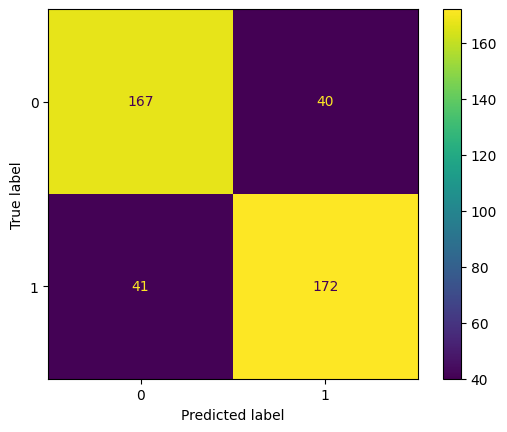

In [61]:
rf2= RandomForestClassifier(n_estimators=30, random_state=3)
rf2.fit(X_traino,y_traino)
y_predhr=rf2.predict(X_testo)
print(classification_report(y_testo,y_predhr))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predhr))
Achr=accuracy_score(y_testo,y_predhr)*100

In [63]:
tbl['Accuracy_hyperparameter']=pd.Series([Achk,Achn,Acht,Acha,Achr])
tbl

,Model,Accuracy,Accuracy_oversampling,Accuracy_hyperparameter
0,KNN,68.666667,65.238095,65.476190
1,SVM,70.000000,55.000000,55.476190
2,Gaussian NB,68.666667,76.904762,75.476190
3,Decision Tree,66.666667,73.571429,81.904762
4,AdaBoostClassifier,73.666667,80.476190,80.714286
5,Random Forest,71.666667,80.476190,NaN


# **PCA**




In [64]:
pca=PCA(n_components=19)
X_trainp=pca.fit_transform(X_traino)
X_testp=pca.transform(X_testo)

Classification model

1.KNN

2.Naive Bayes

3.Decision Tree

4.Adabooster Classifier

5.RandomForest Classifier

              precision    recall  f1-score   support

           0       0.62      0.79      0.69       207
           1       0.72      0.52      0.60       213

    accuracy                           0.65       420
   macro avg       0.67      0.66      0.65       420
weighted avg       0.67      0.65      0.65       420



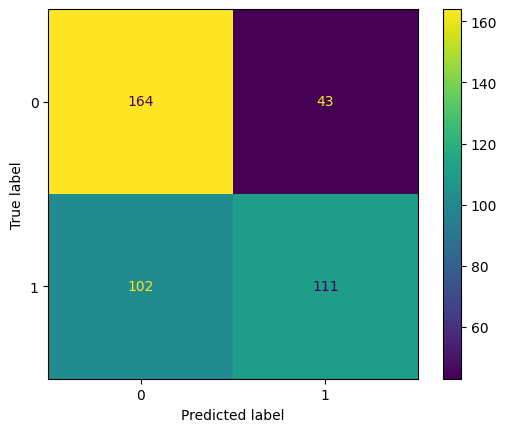

In [65]:
knn3=KNeighborsClassifier(n_neighbors=5 ,weights='distance')
knn3.fit(X_trainp,y_traino)
y_predpk=knn3.predict(X_testp)
print(classification_report(y_testo,y_predpk))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predpk))
Acpk=accuracy_score(y_testo,y_predpk)*100

              precision    recall  f1-score   support

           0       0.64      0.23      0.33       207
           1       0.54      0.87      0.67       213

    accuracy                           0.55       420
   macro avg       0.59      0.55      0.50       420
weighted avg       0.59      0.55      0.50       420



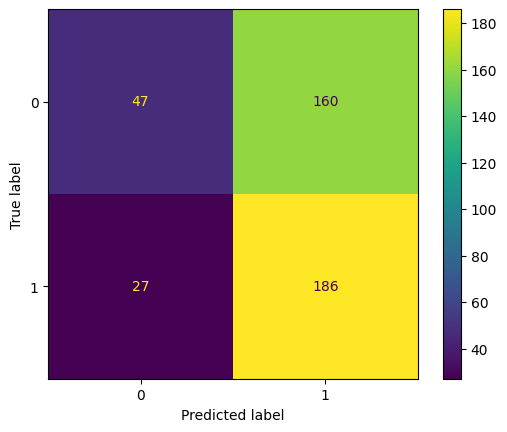

In [66]:
nb3=GaussianNB(var_smoothing= 2.4)
nb3.fit(X_trainp,y_traino)
y_predpn=nb3.predict(X_testp)
print(classification_report(y_testo,y_predpn))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predpn))
Acpn=accuracy_score(y_testo,y_predpn)*100

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       207
           1       0.69      0.69      0.69       213

    accuracy                           0.68       420
   macro avg       0.68      0.68      0.68       420
weighted avg       0.68      0.68      0.68       420



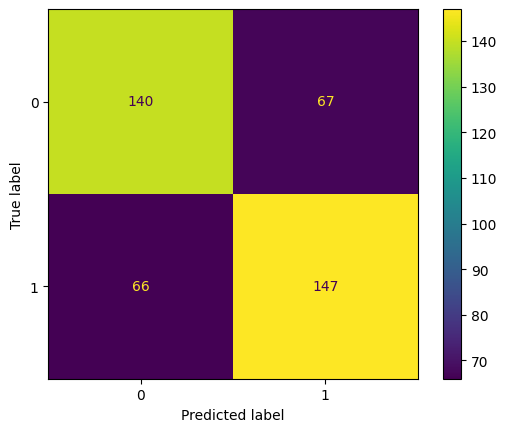

In [67]:
tree3=DecisionTreeClassifier(criterion = 'entropy', splitter= 'best')
tree3.fit(X_trainp,y_traino)
y_predpt=tree3.predict(X_testp)
print(classification_report(y_testo,y_predpt))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predpt))
Acpt=accuracy_score(y_testo,y_predpt)*100

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       207
           1       0.83      0.74      0.78       213

    accuracy                           0.79       420
   macro avg       0.80      0.79      0.79       420
weighted avg       0.80      0.79      0.79       420



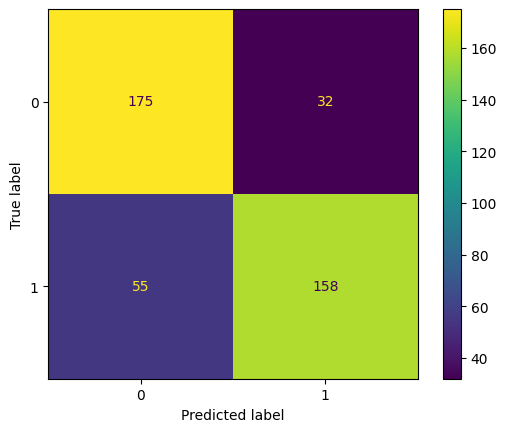

In [68]:
ab3=AdaBoostClassifier(n_estimators=250,random_state=1,learning_rate=0.2)
ab3.fit(X_trainp,y_traino)
y_predpa=ab3.predict(X_testp)
print(classification_report(y_testo,y_predpa))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predpa))
Acpa=accuracy_score(y_testo,y_predpa)*100

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       207
           1       0.82      0.80      0.81       213

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420



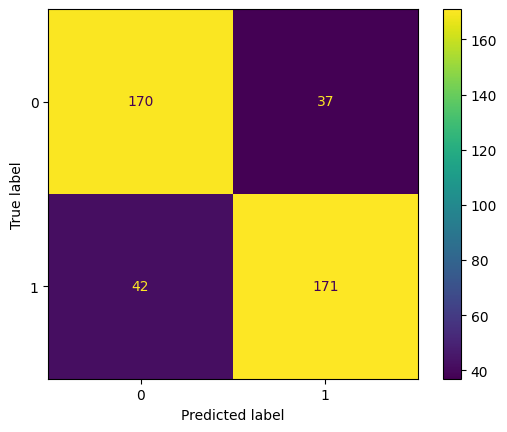

In [69]:
rf3= RandomForestClassifier(n_estimators=30, random_state=3)
rf3.fit(X_trainp,y_traino)
y_predpr=rf3.predict(X_testp)
print(classification_report(y_testo,y_predpr))
print(ConfusionMatrixDisplay.from_predictions(y_testo,y_predpr))
Acpr=accuracy_score(y_testo,y_predpr)*100

# **Accuracy Measures**

In [71]:
tbl['Accuracy_PCA']=pd.Series([Acpk,Acpn,Acpt,Acpa,Acpr])
tbl

,Model,Accuracy,Accuracy_oversampling,Accuracy_hyperparameter,Accuracy_PCA
0,KNN,68.666667,65.238095,65.476190,65.476190
1,SVM,70.000000,55.000000,55.476190,55.476190
2,Gaussian NB,68.666667,76.904762,75.476190,68.333333
3,Decision Tree,66.666667,73.571429,81.904762,79.285714
4,AdaBoostClassifier,73.666667,80.476190,80.714286,81.190476
5,Random Forest,71.666667,80.476190,NaN,NaN


In [72]:
from joblib import dump, load

# Save the model
dump(Acpr, 'model.joblib')

# Load the model
model = load('model.joblib')


In [73]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [79]:
import streamlit as st
import pandas as pd
from joblib import load

# Load the trained model
model = load('model.joblib')

# Title of the app
st.title("Machine Learning Model Deployment with Streamlit")

# Input features
st.write("Enter the input values for prediction:")
feature1 = st.number_input("Feature 1:")
feature2 = st.number_input("Feature 2:")
feature3 = st.number_input("Feature 3:")

# Prediction
if st.button("Predict"):
    input_data = pd.DataFrame([[feature1, feature2, feature3]], columns=['Feature1', 'Feature2', 'Feature3'])
    prediction = model.predict(input_data)
    st.write(f"Prediction: {prediction[0]}")


2025-01-20 09:32:05.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 09:32:05.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 09:32:05.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 09:32:05.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 09:32:05.019 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 09:32:05.021 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 09:32:05.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 09:32:05.024 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [80]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
